# Сессия №1

## Модуль №1 загрузка данных

Устанавливаем настройки для отображения датасета полностью при этом импортирую нужные для загрузки и обработки данных библиотеки

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 700)

### Загружаем нашу таблицу с данными для последующей обработки полученной информации

In [3]:
df = pd.read_csv(r'C:\Users\nicka\Downloads\Telegram Desktop\diabetes_prediction_dataset.csv',sep = ',') # выставляем параметр
df                                                                                                       # sep = ',' т.к. внутри
                                                                                                         # csv документа разделителями
                                                                                                         # являются запятые

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Т.к. колонки обозначены на английском языке и некоторыми аббревиатурами составляем словарь для лучшего понимания данных:

gender - пол человека \
age - возраст человека \
hypertension - есть ли гипертония \
heart_disease - есть ли болезнь сердца \
smoking_history - курил, не курил, сейчас курит \
bmi - индекс массы тела ИМТ \
HbA1c_level - уровень гликозилированного гемоглобина \
blood_glucose_level - уровень глюкозы в крови \
diabetes - есть ли диабет 

## Наша поставленная задача - прогнозирования диабета, следовательно колонка diabetes является целевой для исследований зависимостей и корреляций

Визуализируем пропущенные значения в данных для последующей обработки их

<Axes: >

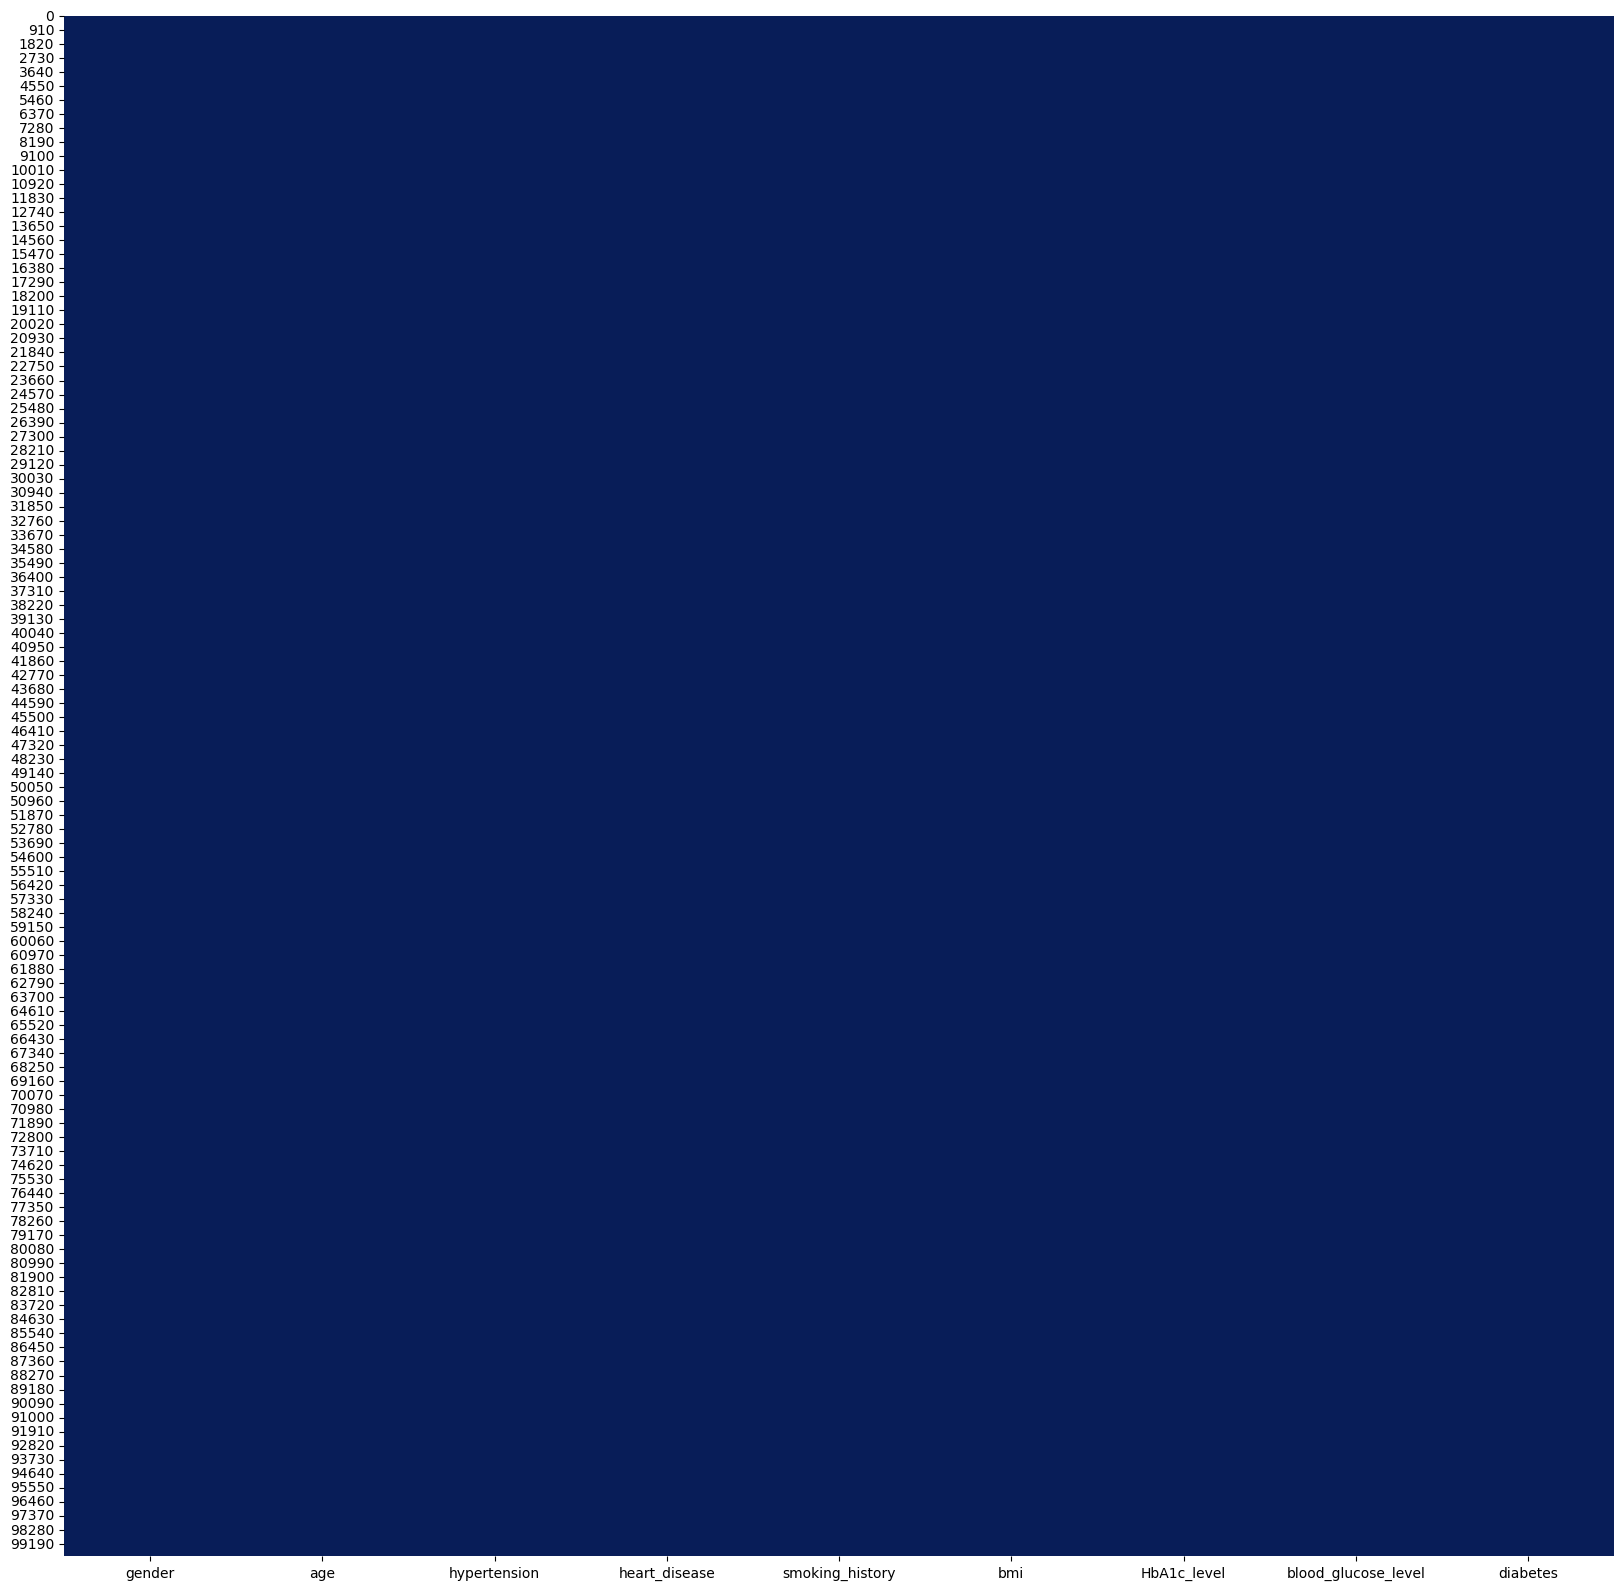

In [4]:
# Импортируем библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
#------------------------------------
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Как видим пропущенных данных нет

### Избавляемся от дубликатов в строках нашего dataframe

In [6]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True,drop = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


### Выводим основную информацию о типе колонок датасета

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


и основываясь на заключении о целевой колонке выводим карту корреляций

<Axes: >

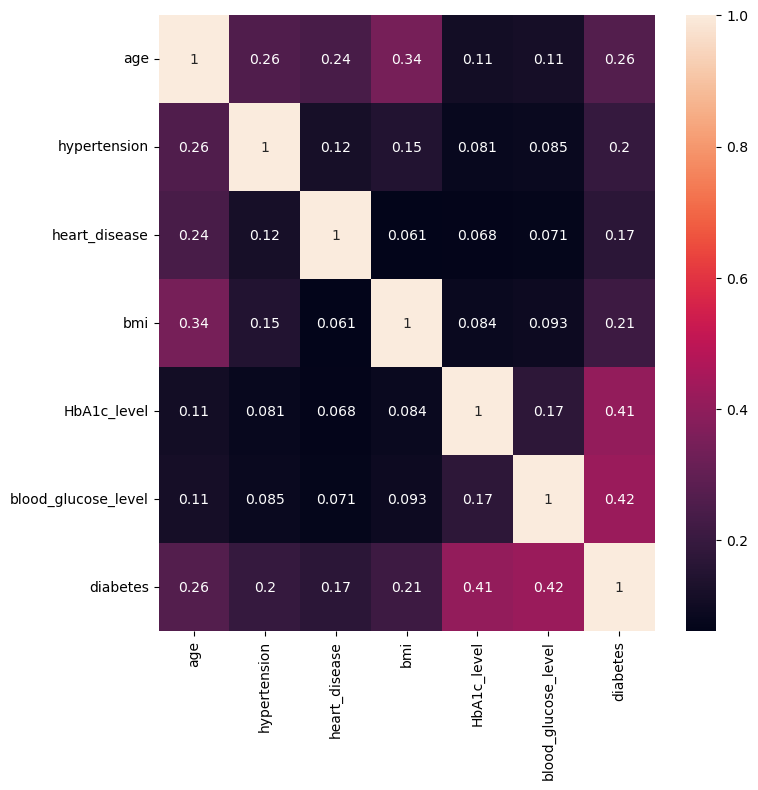

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(data = df.drop(columns = ['gender','smoking_history']).corr(),annot=True)

видим что каждая колонка в наших данных коррелирует с целевой 

разные методы .corr(method = '') kendall spearman

### Выводим данные о различных параметрах числовых данных

для изучения поведения в них и нахождения аномалий и выбросов

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


In [10]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


Проверяем уникальные данные по столбцам на не типичные значения

### Gender

In [11]:
print('gender:')
print(df['gender'].unique())

gender:
['Female' 'Male' 'Other']


Видим что в колонке существует значение Other, попытаемся вывести его и обозначить

In [12]:
df[df['gender'] == 'Other'] 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12589,Other,10.0,0,0,not current,14.09,5.0,140,0
14730,Other,19.0,0,0,No Info,27.32,5.7,158,0
16574,Other,39.0,0,0,not current,31.24,6.2,85,0
18540,Other,10.0,0,0,not current,16.59,6.1,160,0
23023,Other,23.0,0,0,No Info,24.23,6.1,140,0
31547,Other,53.0,0,0,No Info,27.32,6.6,160,0
33299,Other,45.0,0,0,never,27.32,4.0,159,0
34393,Other,47.0,0,0,never,36.76,6.6,90,0
34466,Other,47.0,0,0,never,36.76,3.5,200,0
39626,Other,18.0,0,0,not current,30.19,6.1,90,0


Видим что остальные значения колонки всеразличные, различное кол-во лет, история курения, но колонки hypertension heart_disease и целевая diabetes одинаковые и равны нулю 

Но ведь наша задача состоит в прогнозе диабета, а т.к. мы в строках со значениями other не можем обозначить случаи развития или уже поставленного диабета будем считать эти строки выбросами и очистим данные от них

In [13]:
df.drop(index = df[df['gender'] == 'Other'].index,inplace = True)

In [14]:
df.reset_index(inplace=True,drop=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96123,Female,36.0,0,0,No Info,24.60,4.8,145,0
96124,Female,2.0,0,0,No Info,17.37,6.5,100,0
96125,Male,66.0,0,0,former,27.83,5.7,155,0
96126,Female,24.0,0,0,never,35.42,4.0,100,0


### Smoking_history

In [15]:
print('smoking_history:')
print(df['smoking_history'].unique())

smoking_history:
['never' 'No Info' 'current' 'former' 'ever' 'not current']


видим значение no info(нет информации) в колонке smoking_history

Отобразим некоторые значения строчек с no info

In [16]:
df[df['smoking_history'] == 'No Info'].sample(200).sort_values('age')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
16289,Female,0.24,0,0,No Info,27.32,5.7,158,0
65766,Male,0.32,0,0,No Info,16.30,4.8,155,0
17307,Male,0.32,0,0,No Info,27.32,6.5,145,0
76683,Male,0.32,0,0,No Info,15.80,6.5,155,0
79587,Female,0.72,0,0,No Info,16.33,6.0,90,0
67507,Male,0.72,0,0,No Info,19.09,4.0,158,0
66032,Male,0.72,0,0,No Info,16.00,3.5,140,0
11135,Male,0.80,0,0,No Info,17.75,4.5,160,0
74304,Female,0.88,0,0,No Info,22.25,5.7,145,0


Сгруппируем остальные параметры по smoking_history

In [17]:
df.groupby('smoking_history').mean()

C:\Users\nicka\AppData\Local\Temp\ipykernel_11292\3256710657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoking_history').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,
No Info,32.630484,0.036222,0.027584,25.168421,5.466972,135.382774,0.043946
current,44.102803,0.090464,0.044471,28.443738,5.551082,139.722844,0.103077
ever,49.152114,0.104829,0.078309,28.764286,5.577783,139.330748,0.118089
former,57.020432,0.143779,0.097430,29.633860,5.653769,143.264222,0.170986
never,43.877159,0.092862,0.031865,28.120704,5.545576,138.805524,0.097020
not current,47.718182,0.076742,0.045919,28.219651,5.569932,139.445353,0.108508


Видим что по значению no info значения всех остальных колонок визуально ниже по среднему значению на каждый столбец

Также сравним количество детей в строках с разными значениями smoking_history

In [18]:
df.groupby(['smoking_history','age'])['gender'].count()

smoking_history  age  
No Info          0.08       36
                 0.16       56
                 0.24       82
                 0.32       85
                 0.40       62
                 0.48       79
                 0.56       94
                 0.64       96
                 0.72       96
                 0.80       94
                 0.88       83
                 1.00       79
                 1.08       90
                 1.16       78
                 1.24       83
                 1.32       86
                 1.40       91
                 1.48       96
                 1.56      104
                 1.64      109
                 1.72       88
                 1.80       95
                 1.88       74
                 2.00     1009
                 3.00      833
                 4.00      775
                 5.00      814
                 6.00      757
                 7.00      715
                 8.00      696
                 9.00      606
                

как оказалось в строках значения No Info количество пациентов возрастом меньше 10 лет намного больше чем в остальных колонках, поэтому при группировке средние значения были ниже чем у остальных строк данных

Но строки No info нельзя выбрасывать как недостающие значения, ведь количество всего строк с этим значением занимает второе место с небольшим отрывом

Также нельзя интерпретировать no info(нет информации) как never(никогда не курящий), ведь по таблице видим что даже в колонке с детьми до 10 лет существуют значения former, current, not current и ever: 

In [19]:
df[(df['age']<=10) & ((df['smoking_history'] != 'never') & (df['smoking_history'] !='No Info'))].sort_values('age')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
91575,Female,0.16,0,0,not current,16.55,3.5,160,0
48762,Male,0.24,0,0,not current,15.02,6.6,80,0
64458,Female,0.24,0,0,not current,27.32,5.0,90,0
9578,Male,0.24,0,0,not current,15.62,6.6,100,0
53722,Male,0.32,0,0,current,15.17,4.0,100,0
9988,Female,0.48,0,0,not current,18.87,6.2,140,0
68394,Male,0.64,0,0,not current,18.74,6.6,160,0
37053,Male,0.72,0,0,not current,18.46,6.0,90,0
90588,Male,0.72,0,0,not current,17.66,4.5,159,0
55988,Female,0.80,0,0,not current,15.00,6.1,160,0


Единственный разумный вариант - оставить эти строки, ведь они - важная часть данных без которых мы можем потерять будущую точность модели, ведь они тоже отображают свою информацию и связывают остальные данные

In [20]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

### Также проверяем бинарные данные

на всеразличные выбросы и отклонения

In [21]:
print('hypertension:')
print(df['hypertension'].unique())

hypertension:
[0 1]


In [22]:
print('heart_disease:')
print(df['heart_disease'].unique())

heart_disease:
[1 0]


In [23]:
print('diabetes:')
print(df['diabetes'].unique())

diabetes:
[0 1]


После проверки остальных данных принимаемся за колонки с числовыми значениями и их выбросами

<Axes: >

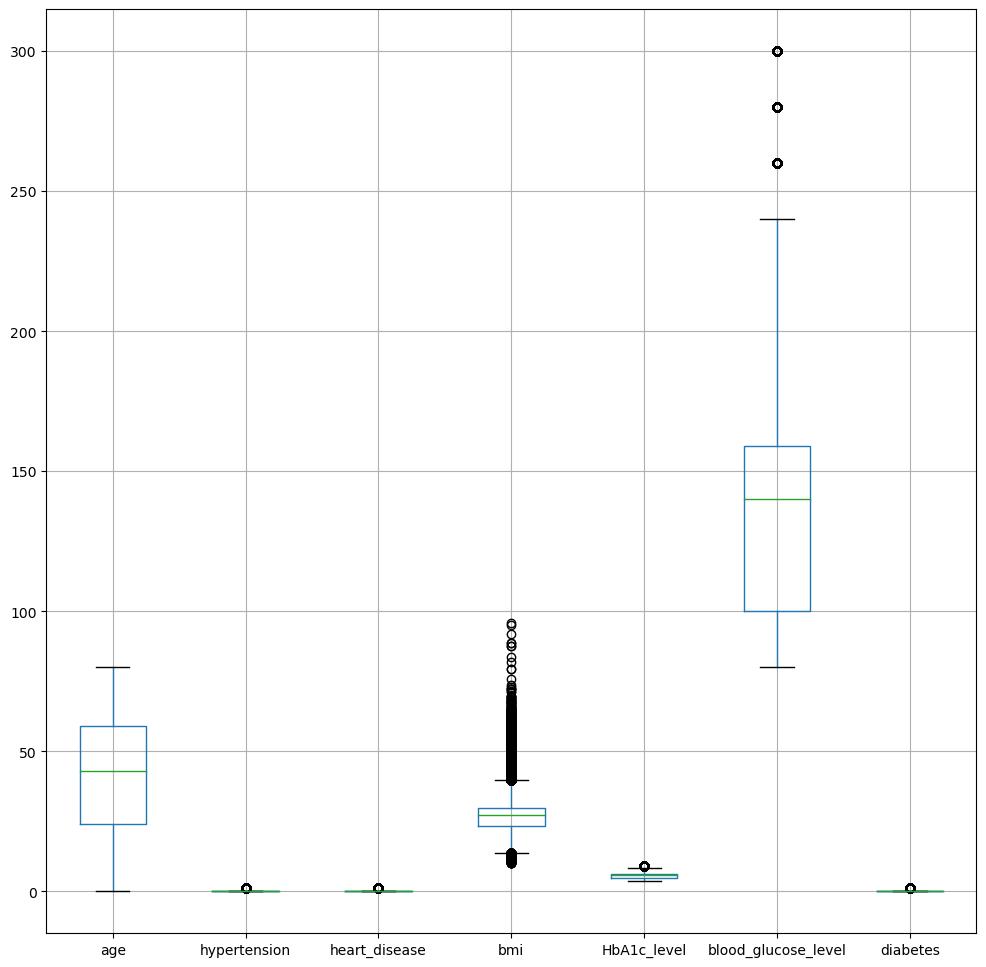

In [24]:
plt.figure(figsize = (12,12))
df.boxplot()

In [25]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = np.percentile(work_val, 25, method= 'midpoint')
    Q3 = np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            if len(df[col].unique()) != 2:
                up,low = quantiles(df[col])
                print(f'{col}: up = {up}, low = {low}')
                df[col] = df[col].drop(index = (df[col][(df[col] < low) | (df[col] > up)]).index) 

    return df.dropna().reset_index(drop=True)

In [26]:
df_copy = df.copy()

In [27]:
df_copy = anti_emmi(df_copy)
df_copy

age: up = 111.5, low = -28.5
bmi: up = 39.55, low = 13.709999999999997
HbA1c_level: up = 8.3, low = 2.6999999999999993
blood_glucose_level: up = 247.5, low = 11.5


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,Female,36.0,0,0,No Info,24.60,4.8,145.0,0
88173,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
88174,Male,66.0,0,0,former,27.83,5.7,155.0,0
88175,Female,24.0,0,0,never,35.42,4.0,100.0,0


Как видим выбросы были удалены

<Axes: >

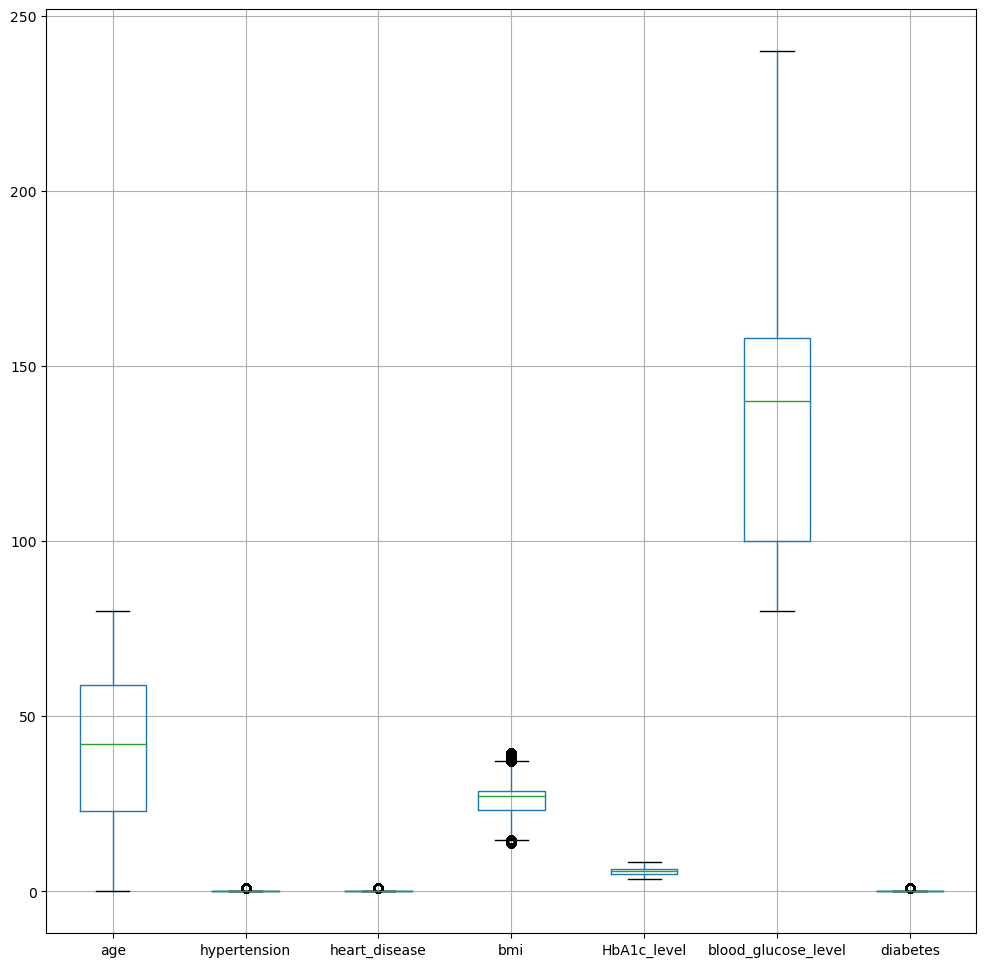

In [28]:
plt.figure(figsize = (12,12))
df_copy.boxplot()

Приводим строковые данные к единой форме

In [29]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = morph.normal_forms(doc)[0]
    return doc


df_copy['gender'] = df_copy['gender'].apply(lemmatize)
df_copy['smoking_history'] = df_copy['smoking_history'].apply(lemmatize)

In [30]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80.0,0,1,never,25.19,6.6,140.0,0
1,female,54.0,0,0,no info,27.32,6.6,80.0,0
2,male,28.0,0,0,never,27.32,5.7,158.0,0
3,female,36.0,0,0,current,23.45,5.0,155.0,0
4,male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,female,36.0,0,0,no info,24.60,4.8,145.0,0
88173,female,2.0,0,0,no info,17.37,6.5,100.0,0
88174,male,66.0,0,0,former,27.83,5.7,155.0,0
88175,female,24.0,0,0,never,35.42,4.0,100.0,0


Кодируем данные для использования при обучении

In [31]:
import joblib

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_gend = le.fit(df_copy.gender)
print(le_gend.classes_)


['female' 'male']


In [33]:
le_gend.transform(le_gend.classes_)

array([0, 1])

In [34]:
joblib.dump(le_gend,'le_gend.joblib')

['le_gend.joblib']

In [35]:
le = LabelEncoder()
le_smok = le.fit(df_copy.smoking_history)
print(le_smok.classes_)


['current' 'ever' 'former' 'never' 'no info' 'not current']


In [36]:
le_smok.transform(le_smok.classes_)

array([0, 1, 2, 3, 4, 5])

In [37]:
joblib.dump(le_smok,'le_smok.joblib')

['le_smok.joblib']

In [38]:
df_copy.gender = le_gend.transform(df_copy.gender)
df_copy.smoking_history = le_smok.transform(df_copy.smoking_history)

In [39]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140.0,0
1,0,54.0,0,0,4,27.32,6.6,80.0,0
2,1,28.0,0,0,3,27.32,5.7,158.0,0
3,0,36.0,0,0,0,23.45,5.0,155.0,0
4,1,76.0,1,1,0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,0,36.0,0,0,4,24.60,4.8,145.0,0
88173,0,2.0,0,0,4,17.37,6.5,100.0,0
88174,1,66.0,0,0,2,27.83,5.7,155.0,0
88175,0,24.0,0,0,3,35.42,4.0,100.0,0


<Axes: >

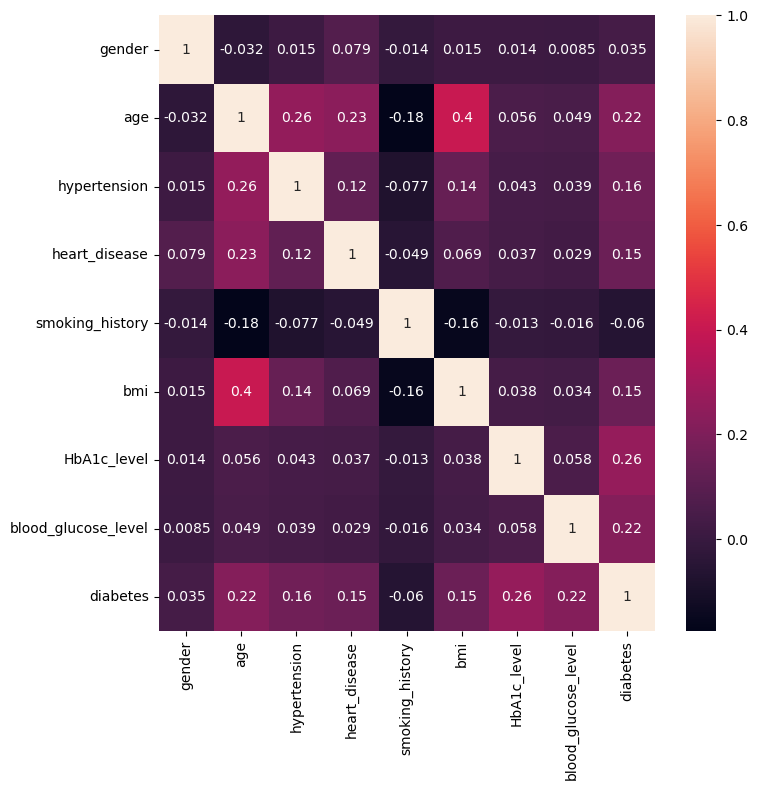

In [40]:
plt.figure(figsize= (8,8))
sns.heatmap(df_copy.corr(),annot=True)

Как видим по матрице корреляции единственная колонка которая плохо коррелирует со всеми остальными это gender попробуем исследовать её значения на зависимости

In [41]:
df_copy.groupby(['gender','age']).mean()

hypertension  heart_disease  smoking_history        bmi  \
gender age                                                              
0      0.08       0.000000       0.000000         4.000000  22.423750   
       0.16       0.000000       0.000000         4.000000  16.256923   
       0.24       0.000000       0.000000         4.030303  17.383030   
       0.32       0.000000       0.000000         3.968750  16.280000   
       0.40       0.000000       0.000000         3.928571  17.384286   
       0.48       0.000000       0.000000         3.976190  16.757143   
       0.56       0.000000       0.000000         3.969697  17.853333   
       0.64       0.000000       0.000000         3.980392  17.206863   
       0.72       0.000000       0.000000         3.955556  17.936889   
       0.80       0.000000       0.000000         3.950000  18.050250   
       0.88       0.000000       0.000000         3.916667  18.275417   
       1.00       0.000000       0.000000         3.913043  19.377609   
       1.08       0.000000       0.000000         3.931818  18.104318   
       1.16       0.000000       0.000000         4.000000  18.621429   
       1.24       0.000000       0.000000         3.928571  18.496667   
       1.32       0.000000       0.000000         3.840000  19.518200   
       1.40       0.000000       0.000000         3.872340  19.063404   
       1.48       0.000000       0.000000         3.877551  19.125306   
       1.56       0.000000       0.000000         3.906250  18.204687   
       1.64       0.000000       0.000000         3.931034  17.744138   
       1.72       0.000000       0.000000         3.868421  19.233421   
       1.80       0.000000       0.000000         3.854167  17.949792   
       1.88       0.000000       0.000000         3.857143  18.585714   
       2.00       0.000000       0.000000         3.892532  18.627887   
       3.00       0.000000       0.000000         3.887892  19.300336   
       4.00       0.002232       0.000000         3.883929  18.590290   
       5.00       0.000000       0.000000         3.890351  18.628706   
       6.00       0.000000       0.000000         3.873810  18.735333   
       7.00       0.000000       0.000000         3.863741  19.586721   
       8.00       0.000000       0.000000         3.905028  19.932011   
       9.00       0.000000       0.000000         3.838068  20.595511   
       10.00      0.000000       0.000000         3.835859  21.897727   
       11.00      0.002674       0.000000         3.791444  22.343556   
       12.00      0.000000       0.000000         3.766827  22.508365   
       13.00      0.000000       0.000000         3.748219  22.888314   
       14.00      0.000000       0.000000         3.668235  23.957129   
       15.00      0.002222       0.000000         3.535556  23.990667   
       16.00      0.000000       0.000000         3.518962  24.697824   
       17.00      0.000000       0.000000         3.378531  24.882411   
       18.00      0.000000       0.000000         3.296178  25.058997   
       19.00      0.000000       0.000000         3.077612  24.974567   
       20.00      0.000000       0.001342         2.951678  25.336013   
       21.00      0.005487       0.000000         2.965706  25.802236   
       22.00      0.001319       0.001319         2.914248  25.778575   
       23.00      0.002632       0.000000         2.752632  25.854513   
       24.00      0.003896       0.000000         2.828571  26.220260   
       25.00      0.009421       0.000000         2.823688  26.337470   
       26.00      0.001319       0.000000         2.812665  26.471689   
       27.00      0.005340       0.000000         2.774366  26.482417   
       28.00      0.003831       0.000000         2.856960  26.713295   
       29.00      0.012771       0.001277         2.822478  27.128480   
       30.00      0.013405       0.001340         2.873995  26.957225   
       31.00      0.012245       0.000000         2.851701  27.155020   

Как можно увидеть по нашей группировке значение пола мужчины больше подвержены заболеванию диабета к старости чем женщины, это также является зависимостью которая может помочь при прогнозах диабета

Вывод - оставляем колонку gender ведь она всё же содержит связь с остальными данными по неявной зависимости

In [42]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140.0,0
1,0,54.0,0,0,4,27.32,6.6,80.0,0
2,1,28.0,0,0,3,27.32,5.7,158.0,0
3,0,36.0,0,0,0,23.45,5.0,155.0,0
4,1,76.0,1,1,0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
88172,0,36.0,0,0,4,24.60,4.8,145.0,0
88173,0,2.0,0,0,4,17.37,6.5,100.0,0
88174,1,66.0,0,0,2,27.83,5.7,155.0,0
88175,0,24.0,0,0,3,35.42,4.0,100.0,0


In [43]:
df_copy.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.415479,39.925934,0.058857,0.030422,3.044005,26.134491,5.397368,132.815376
1,0.493937,61.817887,0.242313,0.153746,2.693374,29.569744,6.577977,167.447813


Также, предобрабатывая данные стоит нормализовать их для получения лучшего результата при последующем обучении модели

In [44]:
df_copy[['age','bmi','HbA1c_level','blood_glucose_level']]

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140.0
1,54.0,27.32,6.6,80.0
2,28.0,27.32,5.7,158.0
3,36.0,23.45,5.0,155.0
4,76.0,20.14,4.8,155.0
...,...,...,...,...
88172,36.0,24.60,4.8,145.0
88173,2.0,17.37,6.5,100.0
88174,66.0,27.83,5.7,155.0
88175,24.0,35.42,4.0,100.0


In [45]:
np.array([3,4,5,6])

array([3, 4, 5, 6])

In [46]:
from sklearn.preprocessing import MinMaxScaler
data = df_copy[['age','bmi','HbA1c_level','blood_glucose_level']]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.transform(data))
scaler = scaler.fit(data)
data = scaler.transform(data)
joblib.dump(scaler,'scaler_age_bmi_HbA1c_glucose.joblib')

MinMaxScaler()
[[1.         0.44427245 0.65957447 0.375     ]
 [0.67467467 0.52670279 0.65957447 0.        ]
 [0.34934935 0.52670279 0.46808511 0.4875    ]
 ...
 [0.82482482 0.54643963 0.46808511 0.46875   ]
 [0.2992993  0.84017028 0.10638298 0.125     ]
 [0.71221221 0.3374613  0.65957447 0.0625    ]]


['scaler_age_bmi_HbA1c_glucose.joblib']

In [47]:
df_copy[['age','bmi','HbA1c_level','blood_glucose_level']] = data
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,3,0.444272,0.659574,0.37500,0
1,0,0.674675,0,0,4,0.526703,0.659574,0.00000,0
2,1,0.349349,0,0,3,0.526703,0.468085,0.48750,0
3,0,0.449449,0,0,0,0.376935,0.319149,0.46875,0
4,1,0.949950,1,1,0,0.248839,0.276596,0.46875,0
...,...,...,...,...,...,...,...,...,...
88172,0,0.449449,0,0,4,0.421440,0.276596,0.40625,0
88173,0,0.024024,0,0,4,0.141641,0.638298,0.12500,0
88174,1,0.824825,0,0,2,0.546440,0.468085,0.46875,0
88175,0,0.299299,0,0,3,0.840170,0.106383,0.12500,0


Рассмотрим полученные данные маркируя их по y

In [48]:
sns.pairplot(df_copy, hue='diabetes')


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000024BC9127B50> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000024BC3C42E60> (for post_execute):



KeyboardInterrupt



In [49]:
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns = 'diabetes')
y = df_copy.diabetes

Text(0.5, 0, 'PC3')

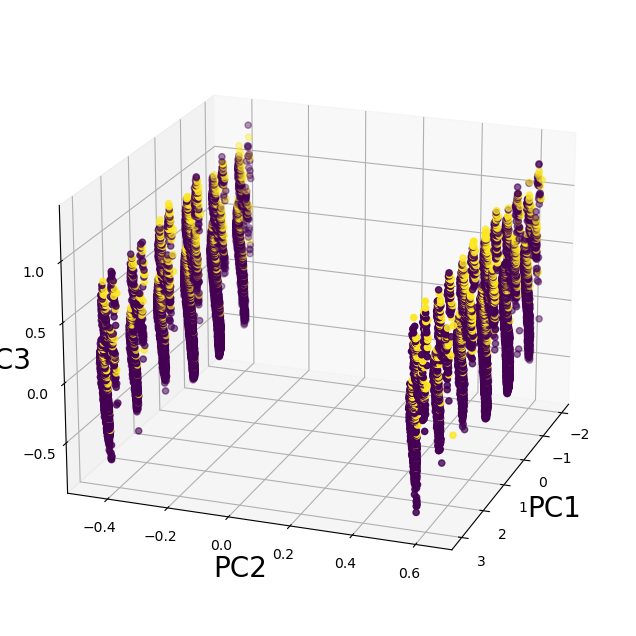

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
Z = pca.transform(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Text(0.5, 0, 'PC3')

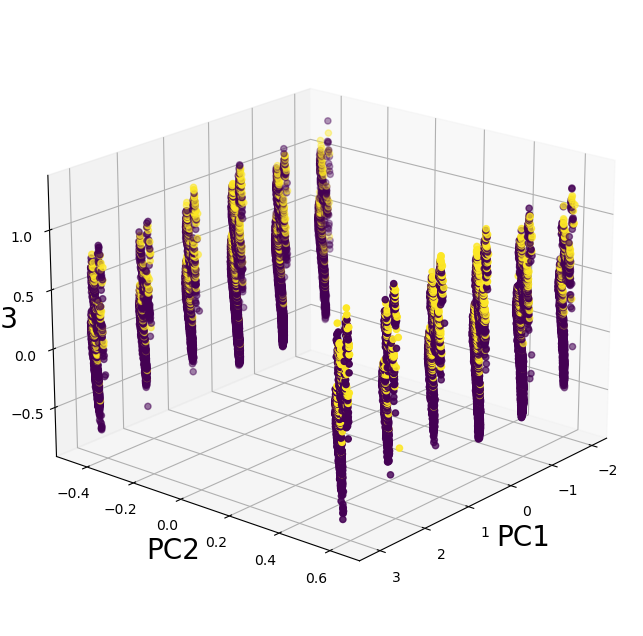

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 40)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Text(0.5, 0, 'PC3')

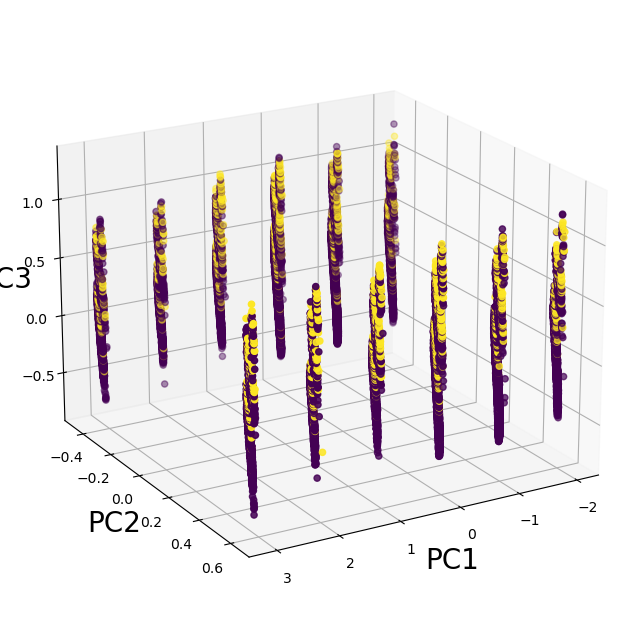

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 60)
ax.scatter(Z.T[0], Z.T[1], Z.T[2], c=y)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Заметим, что в целевой переменной присутствует значительный дисбаланс классов

In [53]:
df_copy['diabetes'].value_counts()

0    83559
1     4618
Name: diabetes, dtype: int64

<Axes: >

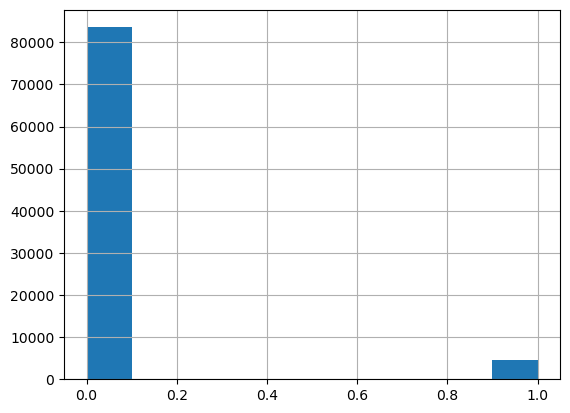

In [54]:
df_copy.diabetes.hist()

Но перед решением этой проблемы сначала разделим наши данные на обучающую и тестирующую выборки

In [55]:
print(X)
print(list(y))

       gender       age  hypertension  heart_disease  smoking_history  \
0           0  1.000000             0              1                3   
1           0  0.674675             0              0                4   
2           1  0.349349             0              0                3   
3           0  0.449449             0              0                0   
4           1  0.949950             1              1                0   
...       ...       ...           ...            ...              ...   
88172       0  0.449449             0              0                4   
88173       0  0.024024             0              0                4   
88174       1  0.824825             0              0                2   
88175       0  0.299299             0              0                3   
88176       0  0.712212             0              0                0   

            bmi  HbA1c_level  blood_glucose_level  
0      0.444272     0.659574              0.37500  
1      0.526703    

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

А теперь избавляемся от дисбаланса классов заполняя обучающую выборку

In [57]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

Теперь видим что дисбаланс по классам пропал

<Axes: >

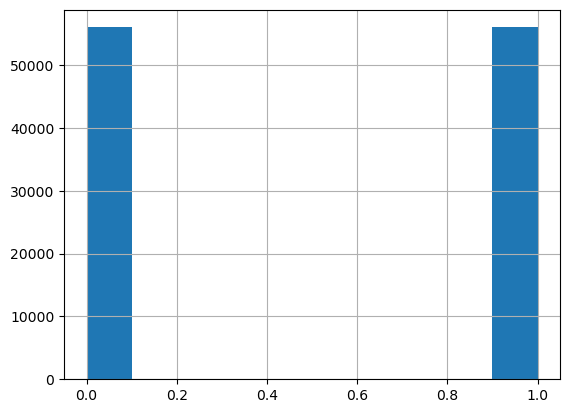

In [176]:
y_train.hist()

# Gender оставление VS Gender убивение

In [177]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
    loss_function='Logloss'
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)

0:	learn: 0.5146961	test: 0.5220878	best: 0.5220878 (0)	total: 19.8ms	remaining: 7.91s
1:	learn: 0.4078023	test: 0.4056788	best: 0.4056788 (1)	total: 40.6ms	remaining: 8.07s
2:	learn: 0.3446848	test: 0.3328335	best: 0.3328335 (2)	total: 60.7ms	remaining: 8.03s
3:	learn: 0.3055019	test: 0.2993562	best: 0.2993562 (3)	total: 81.8ms	remaining: 8.1s
4:	learn: 0.2830684	test: 0.2804918	best: 0.2804918 (4)	total: 103ms	remaining: 8.13s
5:	learn: 0.2688431	test: 0.2713715	best: 0.2713715 (5)	total: 123ms	remaining: 8.1s
6:	learn: 0.2460928	test: 0.2612748	best: 0.2612748 (6)	total: 150ms	remaining: 8.4s
7:	learn: 0.2280923	test: 0.2391618	best: 0.2391618 (7)	total: 173ms	remaining: 8.47s
8:	learn: 0.2178694	test: 0.2334181	best: 0.2334181 (8)	total: 192ms	remaining: 8.35s
9:	learn: 0.1972340	test: 0.2218283	best: 0.2218283 (9)	total: 207ms	remaining: 8.09s
10:	learn: 0.1858320	test: 0.2153371	best: 0.2153371 (10)	total: 223ms	remaining: 7.88s
11:	learn: 0.1817577	test: 0.2094955	best: 0.209495

97:	learn: 0.0667377	test: 0.0935109	best: 0.0935109 (97)	total: 1.74s	remaining: 5.35s
98:	learn: 0.0664492	test: 0.0933497	best: 0.0933497 (98)	total: 1.76s	remaining: 5.34s
99:	learn: 0.0663529	test: 0.0933067	best: 0.0933067 (99)	total: 1.77s	remaining: 5.32s
100:	learn: 0.0662253	test: 0.0932024	best: 0.0932024 (100)	total: 1.79s	remaining: 5.29s
101:	learn: 0.0660611	test: 0.0931275	best: 0.0931275 (101)	total: 1.8s	remaining: 5.27s
102:	learn: 0.0659545	test: 0.0930641	best: 0.0930641 (102)	total: 1.82s	remaining: 5.25s
103:	learn: 0.0657009	test: 0.0929473	best: 0.0929473 (103)	total: 1.84s	remaining: 5.23s
104:	learn: 0.0654694	test: 0.0927893	best: 0.0927893 (104)	total: 1.85s	remaining: 5.21s
105:	learn: 0.0652922	test: 0.0927154	best: 0.0927154 (105)	total: 1.87s	remaining: 5.19s
106:	learn: 0.0651797	test: 0.0926723	best: 0.0926723 (106)	total: 1.89s	remaining: 5.17s
107:	learn: 0.0649126	test: 0.0925363	best: 0.0925363 (107)	total: 1.91s	remaining: 5.15s
108:	learn: 0.064

191:	learn: 0.0539995	test: 0.0878799	best: 0.0878799 (191)	total: 3.74s	remaining: 4.05s
192:	learn: 0.0537824	test: 0.0878560	best: 0.0878560 (192)	total: 3.76s	remaining: 4.04s
193:	learn: 0.0535209	test: 0.0877782	best: 0.0877782 (193)	total: 3.79s	remaining: 4.02s
194:	learn: 0.0534353	test: 0.0877693	best: 0.0877693 (194)	total: 3.81s	remaining: 4s
195:	learn: 0.0533936	test: 0.0877488	best: 0.0877488 (195)	total: 3.83s	remaining: 3.99s
196:	learn: 0.0532406	test: 0.0876749	best: 0.0876749 (196)	total: 3.86s	remaining: 3.97s
197:	learn: 0.0530332	test: 0.0874513	best: 0.0874513 (197)	total: 3.88s	remaining: 3.96s
198:	learn: 0.0528514	test: 0.0873635	best: 0.0873635 (198)	total: 3.9s	remaining: 3.94s
199:	learn: 0.0528060	test: 0.0873457	best: 0.0873457 (199)	total: 3.91s	remaining: 3.91s
200:	learn: 0.0527441	test: 0.0873741	best: 0.0873457 (199)	total: 3.94s	remaining: 3.9s
201:	learn: 0.0527061	test: 0.0873772	best: 0.0873457 (199)	total: 3.96s	remaining: 3.88s
202:	learn: 0.0

291:	learn: 0.0474921	test: 0.0863959	best: 0.0863709 (290)	total: 5.9s	remaining: 2.18s
292:	learn: 0.0474545	test: 0.0863781	best: 0.0863709 (290)	total: 5.92s	remaining: 2.16s
293:	learn: 0.0474211	test: 0.0863656	best: 0.0863656 (293)	total: 5.93s	remaining: 2.14s
294:	learn: 0.0473327	test: 0.0863456	best: 0.0863456 (294)	total: 5.95s	remaining: 2.12s
295:	learn: 0.0472660	test: 0.0863527	best: 0.0863456 (294)	total: 5.97s	remaining: 2.1s
296:	learn: 0.0472341	test: 0.0863640	best: 0.0863456 (294)	total: 5.99s	remaining: 2.08s
297:	learn: 0.0472004	test: 0.0863595	best: 0.0863456 (294)	total: 6.01s	remaining: 2.06s
298:	learn: 0.0471441	test: 0.0863339	best: 0.0863339 (298)	total: 6.03s	remaining: 2.04s
299:	learn: 0.0470980	test: 0.0863043	best: 0.0863043 (299)	total: 6.05s	remaining: 2.02s
300:	learn: 0.0470640	test: 0.0863060	best: 0.0863043 (299)	total: 6.07s	remaining: 1.99s
301:	learn: 0.0470157	test: 0.0863177	best: 0.0863043 (299)	total: 6.08s	remaining: 1.97s
302:	learn: 

393:	learn: 0.0435034	test: 0.0862568	best: 0.0861401 (368)	total: 7.81s	remaining: 119ms
394:	learn: 0.0434776	test: 0.0862328	best: 0.0861401 (368)	total: 7.83s	remaining: 99.1ms
395:	learn: 0.0434599	test: 0.0862324	best: 0.0861401 (368)	total: 7.85s	remaining: 79.3ms
396:	learn: 0.0434187	test: 0.0862187	best: 0.0861401 (368)	total: 7.87s	remaining: 59.5ms
397:	learn: 0.0433915	test: 0.0861998	best: 0.0861401 (368)	total: 7.89s	remaining: 39.6ms
398:	learn: 0.0433593	test: 0.0862166	best: 0.0861401 (368)	total: 7.9s	remaining: 19.8ms
399:	learn: 0.0433214	test: 0.0862146	best: 0.0861401 (368)	total: 7.92s	remaining: 0us

bestTest = 0.08614010836
bestIteration = 368

Shrink model to first 369 iterations.


In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27529
           1       0.88      0.51      0.64      1570

    accuracy                           0.97     29099
   macro avg       0.92      0.75      0.81     29099
weighted avg       0.97      0.97      0.97     29099



In [179]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
53698,1,0.211712,0,0,4,0.188467,0.106383,0.28750
34685,0,0.724725,0,0,4,0.526703,0.638298,0.48750
39153,1,1.000000,0,0,1,0.221749,0.106383,0.46875
65192,1,0.824825,0,0,5,0.548762,0.212766,0.46875
83289,1,1.000000,0,0,2,0.526703,0.276596,0.31250
...,...,...,...,...,...,...,...,...
46302,1,0.912412,0,0,3,0.875774,0.531915,0.37500
26058,0,0.774775,0,0,4,0.526703,0.468085,0.50000
3603,0,0.524525,0,0,3,0.936533,0.531915,0.49375
11846,0,0.837337,0,0,3,0.262771,0.659574,0.50000


In [180]:
y_test

53698    0
34685    0
39153    0
65192    0
83289    0
        ..
46302    0
26058    0
3603     0
11846    0
55743    0
Name: diabetes, Length: 29099, dtype: int64

In [181]:
import pickle
pickle.dump(model, open('Подготовка1_model.pkl', 'wb')) #Saving the model

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
        X.drop(columns='gender'), y, test_size=0.33, random_state=42)
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [183]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
    loss_function='CrossEntropy'
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)

0:	learn: 0.4939686	test: 0.4843253	best: 0.4843253 (0)	total: 25.4ms	remaining: 10.1s
1:	learn: 0.4091793	test: 0.4158180	best: 0.4158180 (1)	total: 43.9ms	remaining: 8.73s
2:	learn: 0.3425920	test: 0.3378706	best: 0.3378706 (2)	total: 64.8ms	remaining: 8.57s
3:	learn: 0.3058438	test: 0.3032139	best: 0.3032139 (3)	total: 84.5ms	remaining: 8.36s
4:	learn: 0.2851979	test: 0.2823975	best: 0.2823975 (4)	total: 103ms	remaining: 8.15s
5:	learn: 0.2706757	test: 0.2661144	best: 0.2661144 (5)	total: 124ms	remaining: 8.16s
6:	learn: 0.2492190	test: 0.2579962	best: 0.2579962 (6)	total: 145ms	remaining: 8.13s
7:	learn: 0.2297576	test: 0.2472516	best: 0.2472516 (7)	total: 165ms	remaining: 8.06s
8:	learn: 0.2125687	test: 0.2387020	best: 0.2387020 (8)	total: 189ms	remaining: 8.22s
9:	learn: 0.2071591	test: 0.2323130	best: 0.2323130 (9)	total: 211ms	remaining: 8.24s
10:	learn: 0.1941782	test: 0.2184750	best: 0.2184750 (10)	total: 253ms	remaining: 8.93s
11:	learn: 0.1853966	test: 0.2129642	best: 0.212

101:	learn: 0.0721938	test: 0.0968831	best: 0.0968831 (101)	total: 2.03s	remaining: 5.92s
102:	learn: 0.0718828	test: 0.0967595	best: 0.0967595 (102)	total: 2.04s	remaining: 5.89s
103:	learn: 0.0714177	test: 0.0965818	best: 0.0965818 (103)	total: 2.06s	remaining: 5.86s
104:	learn: 0.0712865	test: 0.0964547	best: 0.0964547 (104)	total: 2.08s	remaining: 5.83s
105:	learn: 0.0709233	test: 0.0961627	best: 0.0961627 (105)	total: 2.1s	remaining: 5.81s
106:	learn: 0.0706039	test: 0.0960306	best: 0.0960306 (106)	total: 2.12s	remaining: 5.79s
107:	learn: 0.0704264	test: 0.0958764	best: 0.0958764 (107)	total: 2.14s	remaining: 5.78s
108:	learn: 0.0701882	test: 0.0957022	best: 0.0957022 (108)	total: 2.16s	remaining: 5.77s
109:	learn: 0.0699004	test: 0.0955480	best: 0.0955480 (109)	total: 2.18s	remaining: 5.76s
110:	learn: 0.0695868	test: 0.0953817	best: 0.0953817 (110)	total: 2.21s	remaining: 5.74s
111:	learn: 0.0694513	test: 0.0953301	best: 0.0953301 (111)	total: 2.23s	remaining: 5.73s
112:	learn:

199:	learn: 0.0567354	test: 0.0890729	best: 0.0890729 (199)	total: 4.23s	remaining: 4.23s
200:	learn: 0.0566834	test: 0.0890618	best: 0.0890618 (200)	total: 4.25s	remaining: 4.21s
201:	learn: 0.0566090	test: 0.0890045	best: 0.0890045 (201)	total: 4.27s	remaining: 4.19s
202:	learn: 0.0565116	test: 0.0889825	best: 0.0889825 (202)	total: 4.29s	remaining: 4.17s
203:	learn: 0.0564406	test: 0.0889437	best: 0.0889437 (203)	total: 4.31s	remaining: 4.14s
204:	learn: 0.0563706	test: 0.0888995	best: 0.0888995 (204)	total: 4.34s	remaining: 4.13s
205:	learn: 0.0563234	test: 0.0888483	best: 0.0888483 (205)	total: 4.36s	remaining: 4.11s
206:	learn: 0.0562155	test: 0.0888407	best: 0.0888407 (206)	total: 4.38s	remaining: 4.08s
207:	learn: 0.0561222	test: 0.0888353	best: 0.0888353 (207)	total: 4.4s	remaining: 4.06s
208:	learn: 0.0560536	test: 0.0888144	best: 0.0888144 (208)	total: 4.42s	remaining: 4.04s
209:	learn: 0.0559590	test: 0.0887909	best: 0.0887909 (209)	total: 4.44s	remaining: 4.02s
210:	learn:

291:	learn: 0.0518849	test: 0.0873847	best: 0.0873847 (291)	total: 6.2s	remaining: 2.29s
292:	learn: 0.0518385	test: 0.0873656	best: 0.0873656 (292)	total: 6.21s	remaining: 2.27s
293:	learn: 0.0517705	test: 0.0873739	best: 0.0873656 (292)	total: 6.22s	remaining: 2.24s
294:	learn: 0.0517158	test: 0.0873878	best: 0.0873656 (292)	total: 6.24s	remaining: 2.22s
295:	learn: 0.0516634	test: 0.0873608	best: 0.0873608 (295)	total: 6.25s	remaining: 2.2s
296:	learn: 0.0515747	test: 0.0873463	best: 0.0873463 (296)	total: 6.27s	remaining: 2.17s
297:	learn: 0.0515723	test: 0.0873454	best: 0.0873454 (297)	total: 6.28s	remaining: 2.15s
298:	learn: 0.0515153	test: 0.0873400	best: 0.0873400 (298)	total: 6.3s	remaining: 2.13s
299:	learn: 0.0514827	test: 0.0873502	best: 0.0873400 (298)	total: 6.32s	remaining: 2.1s
300:	learn: 0.0514559	test: 0.0873528	best: 0.0873400 (298)	total: 6.33s	remaining: 2.08s
301:	learn: 0.0514162	test: 0.0873350	best: 0.0873350 (301)	total: 6.35s	remaining: 2.06s
302:	learn: 0.

392:	learn: 0.0474851	test: 0.0867198	best: 0.0866951 (380)	total: 7.71s	remaining: 137ms
393:	learn: 0.0474511	test: 0.0866987	best: 0.0866951 (380)	total: 7.73s	remaining: 118ms
394:	learn: 0.0474315	test: 0.0866837	best: 0.0866837 (394)	total: 7.75s	remaining: 98.1ms
395:	learn: 0.0473885	test: 0.0867114	best: 0.0866837 (394)	total: 7.76s	remaining: 78.4ms
396:	learn: 0.0473679	test: 0.0867183	best: 0.0866837 (394)	total: 7.78s	remaining: 58.8ms
397:	learn: 0.0473251	test: 0.0867202	best: 0.0866837 (394)	total: 7.79s	remaining: 39.2ms
398:	learn: 0.0473056	test: 0.0867077	best: 0.0866837 (394)	total: 7.8s	remaining: 19.6ms
399:	learn: 0.0472548	test: 0.0866991	best: 0.0866837 (394)	total: 7.82s	remaining: 0us

bestTest = 0.08668373741
bestIteration = 394

Shrink model to first 395 iterations.


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27529
           1       0.88      0.52      0.65      1570

    accuracy                           0.97     29099
   macro avg       0.93      0.76      0.82     29099
weighted avg       0.97      0.97      0.97     29099

